In [154]:
library(quantmod)
library(ggplot2)
library(tseries)

# Download Apple data from Yahoo Finance
getSymbols("AAPL", src = "yahoo", from = '2000-01-01', to = '2019-04-01', getSymbols.yahoo.warning=FALSE)

# Show first few rows from the dataset
head(AAPL)

[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2000-01-03  3.745536  4.017857 3.631696   3.997768   133949200      2.665724
2000-01-04  3.866071  3.950893 3.613839   3.660714   128094400      2.440975
2000-01-05  3.705357  3.948661 3.678571   3.714286   194580400      2.476697
2000-01-06  3.790179  3.821429 3.392857   3.392857   191993200      2.262367
2000-01-07  3.446429  3.607143 3.410714   3.553571   115183600      2.369532
2000-01-10  3.642857  3.651786 3.383929   3.491071   126266000      2.327857

In [167]:
library(rugarch)

In [155]:
summary(AAPL)

     Index              AAPL.Open          AAPL.High           AAPL.Low       
 Min.   :2000-01-03   Min.   :  0.9279   Min.   :  0.9421   Min.   :  0.9086  
 1st Qu.:2004-10-26   1st Qu.:  4.4715   1st Qu.:  4.5777   1st Qu.:  4.3505  
 Median :2009-08-17   Median : 26.6836   Median : 26.9686   Median : 26.2800  
 Mean   :2009-08-16   Mean   : 53.1514   Mean   : 53.6527   Mean   : 52.6174  
 3rd Qu.:2014-06-09   3rd Qu.: 93.9725   3rd Qu.: 94.7200   3rd Qu.: 92.9650  
 Max.   :2019-03-29   Max.   :230.7800   Max.   :233.4700   Max.   :229.7800  
   AAPL.Close        AAPL.Volume        AAPL.Adjusted     
 Min.   :  0.9371   Min.   :9.835e+06   Min.   :  0.6249  
 1st Qu.:  4.4793   1st Qu.:5.110e+07   1st Qu.:  2.9868  
 Median : 26.5957   Median :9.172e+07   Median : 17.7341  
 Mean   : 53.1472   Mean   :1.184e+08   Mean   : 46.5953  
 3rd Qu.: 93.8650   3rd Qu.:1.541e+08   3rd Qu.: 83.6806  
 Max.   :232.0700   Max.   :1.855e+09   Max.   :230.2755  

In [232]:
Price = as.xts(AAPL$AAPL.Adjusted)
names(Price) = c("price")

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.


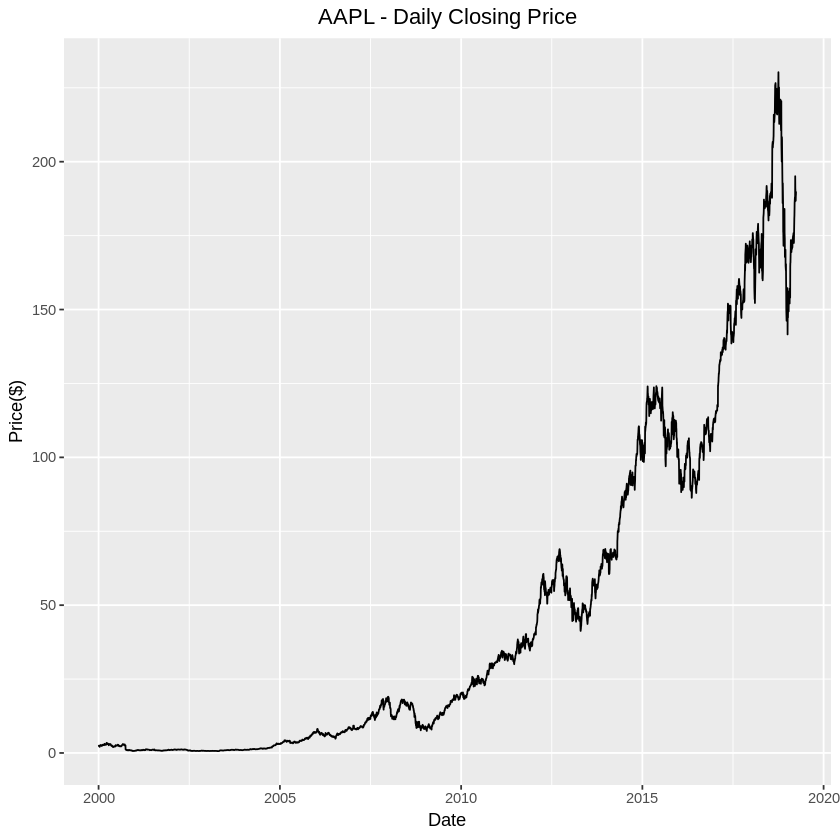

In [233]:
# Plot the daily closing price of JPM
ggplot(Price, aes(Index)) + 
    geom_line(aes(y = Price$price)) + 
    ggtitle("AAPL - Daily Closing Price") +
    labs(x = "Date", y = "Price($)") + 
    theme(plot.title = element_text(hjust = 0.5))

In [158]:
adf.test(Price)


	Augmented Dickey-Fuller Test

data:  Price
Dickey-Fuller = -1.2984, Lag order = 16, p-value = 0.8754
alternative hypothesis: stationary


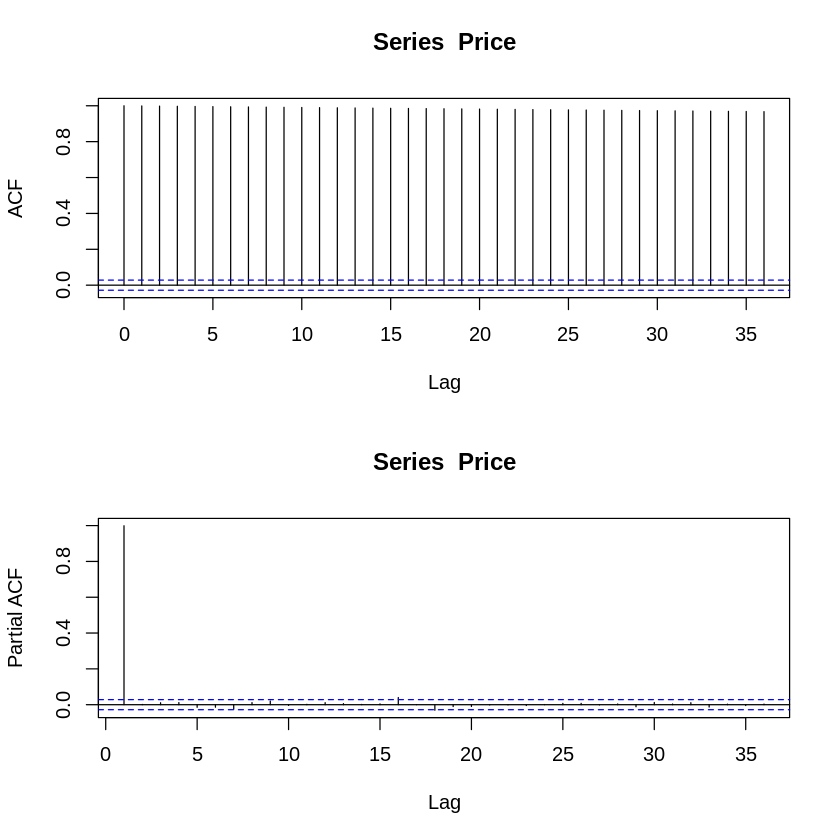

In [159]:
par(mfrow=c(2,1))
acf(Price)
pacf(Price)

In [160]:
# Applying diff1
diff1 = diff(Price, differences = 1)
diff1 = diff1[2:nrow(diff1)]
adf.test(diff1)

Warning message in adf.test(diff1):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  diff1
Dickey-Fuller = -15.04, Lag order = 16, p-value = 0.01
alternative hypothesis: stationary


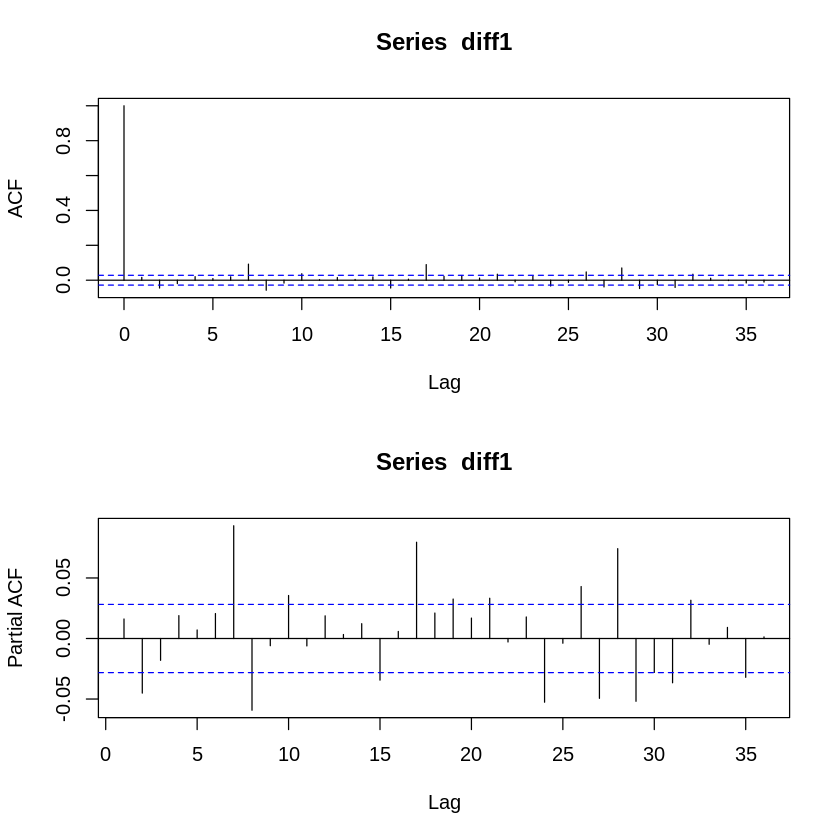

In [161]:
par(mfrow=c(2,1))
acf(diff1)
pacf(diff1)

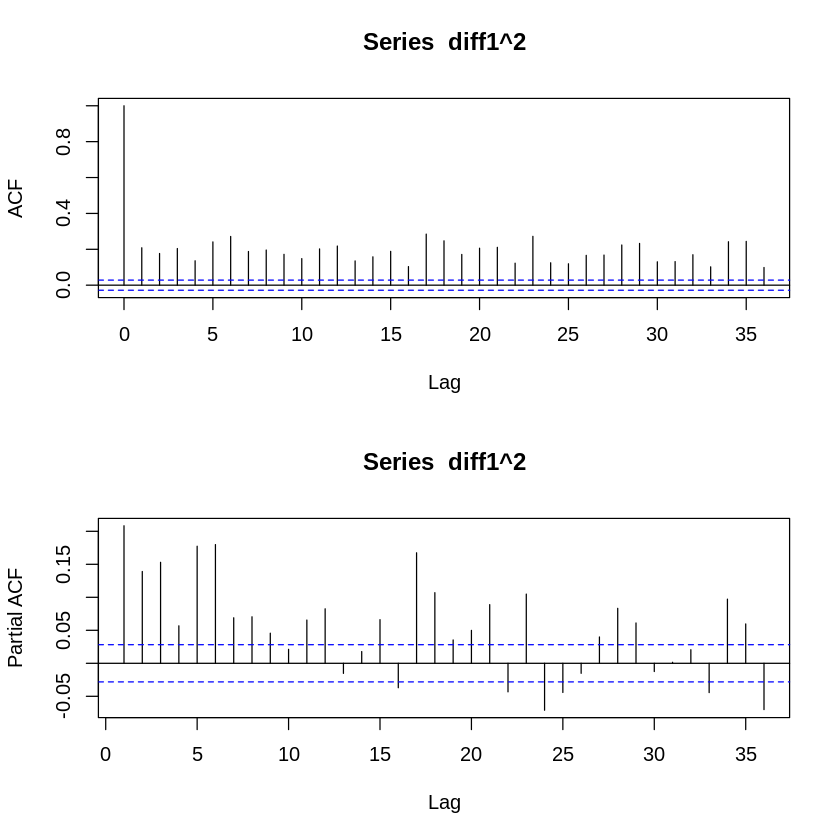

In [162]:
par(mfrow=c(2,1))
acf(diff1^2)
pacf(diff1^2)

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.


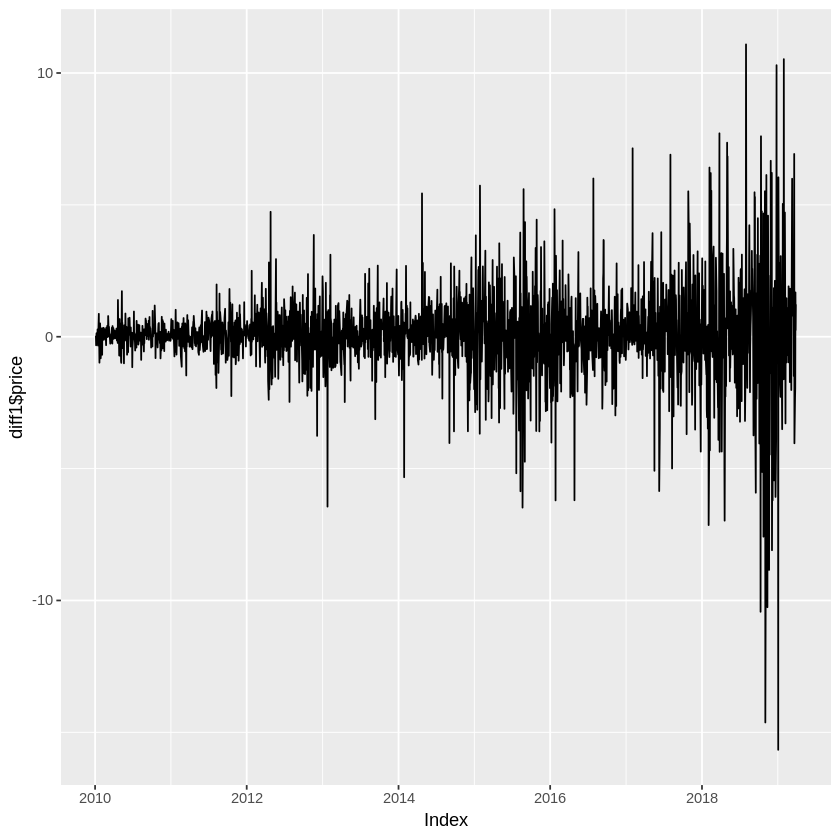

In [153]:
# Plot the daily closing price of JPM
ggplot(diff1, aes(Index)) + 
    geom_line(aes(y = diff1$price)) + 
    theme(plot.title = element_text(hjust = 0.5))

In [182]:
spec = ugarchspec(mean.model = list(armaOrder = c(1,1), arfima = TRUE))
show(spec)
#show(ugarchspec())


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,d,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 



In [185]:
nrow(Price)

[1] 4840

In [186]:
fit = ugarchfit(spec, Price[3000:4000], solver='hybrid')
show(fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,d,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu     37.096037    0.917846  40.41640 0.000000
ar1     1.000000    0.001641 609.48639 0.000000
ma1    -0.038824    0.064100  -0.60568 0.544729
arfima  0.045964    0.055220   0.83239 0.405191
omega   0.056775    0.017811   3.18756 0.001435
alpha1  0.086947    0.021813   3.98609 0.000067
beta1   0.881776    0.027063  32.58246 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu     37.096037    0.081138 457.19657 0.000000
ar1     1.000000    0.001871 534.60573 0.000000
ma1    -0.038824    0.071621  -0.54207 0.587767
arfima  0.045964    0.060555   0.75905 0.447825
omega   0.056775    0.024299   2.33651 0.0

In [242]:
periodToPredict = 50
Train = Price[1:(nrow(Price)-periodToPredict)]
Test = Price[(nrow(Price)-periodToPredict):nrow(Price)]
tail(Train)
head(Test)

              price
2019-01-09 152.6553
2019-01-10 153.1432
2019-01-11 151.6396
2019-01-14 149.3594
2019-01-15 152.4163
2019-01-16 154.2783

              price
2019-01-17 155.1944
2019-01-18 156.1503
2019-01-22 152.6453
2019-01-23 153.2627
2019-01-24 152.0479
2019-01-25 157.0863

In [293]:
spec = ugarchspec()
fit = ugarchfit(spec, Price, solver='hybrid', out.sample = periodToPredict)
show(fit)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      2.667274    0.509986    5.23009  0.00000
ar1     1.000000    0.000298 3356.73841  0.00000
ma1     0.006499    0.016014    0.40585  0.68485
omega   0.000003    0.000003    1.00568  0.31457
alpha1  0.094288    0.009854    9.56838  0.00000
beta1   0.921841    0.007244  127.25223  0.00000

Robust Standard Errors:
        Estimate  Std. Error    t value Pr(>|t|)
mu      2.667274    0.149704   17.81693 0.000000
ar1     1.000000    0.000441 2265.31554 0.000000
ma1     0.006499    0.016862    0.38545 0.699900
omega   0.000003    0.000010    0.35647 0.721488
alpha1  0.094288    0.039620    2.37980 0.017322
beta1   0.921841    0.030283 


please wait...calculating quantiles...


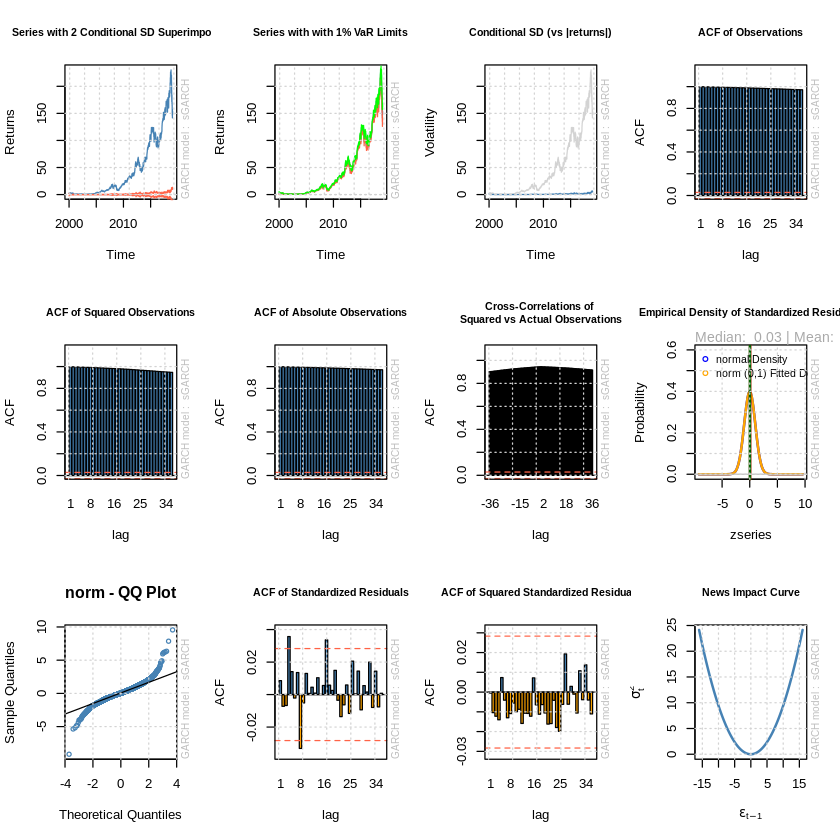

In [294]:
plot(fit, which = "all")

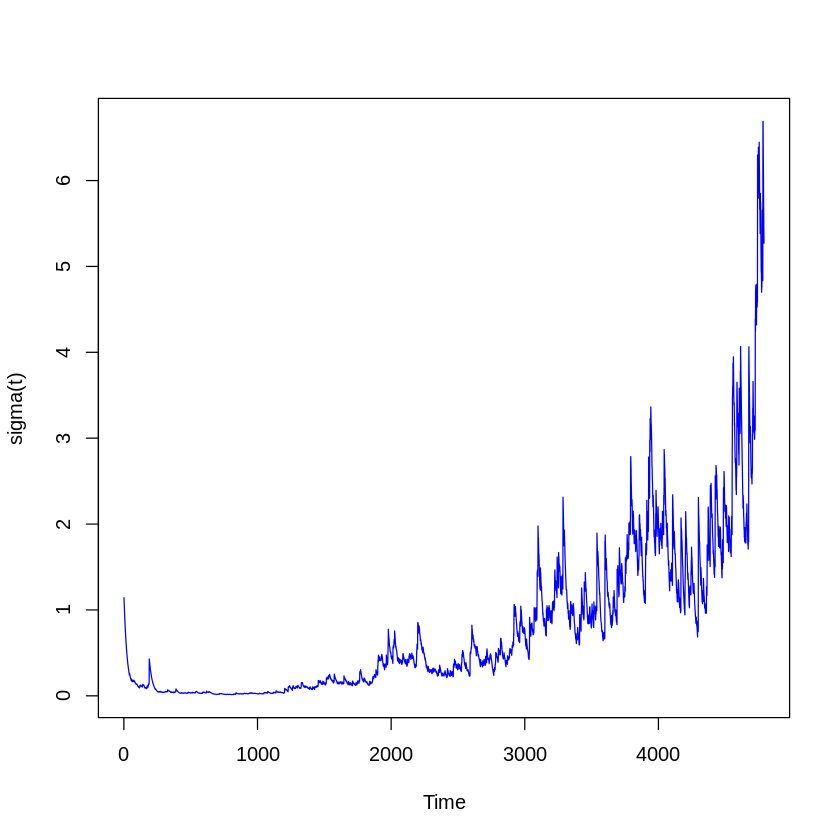

In [295]:
plot.ts(sigma(fit), ylab="sigma(t)", col="blue")



*-----------------------------------*
*     GARCH Bootstrap Forecast      *
*-----------------------------------*
Model : sGARCH
n.ahead : 50
Bootstrap method:  partial
Date (T[0]): 2019-01-16

Series (summary):
        min   q.25   mean   q.75    max forecast[analytic]
t+1  107.63 152.61 153.83 157.97 165.19             154.29
t+2  110.51 151.37 154.20 158.70 174.17             154.29
t+3  119.57 151.62 154.24 159.39 178.62             154.29
t+4  133.58 150.90 155.91 161.10 179.30             154.29
t+5  127.44 150.94 156.78 165.96 174.77             154.29
t+6  128.82 149.49 157.01 166.03 182.97             154.29
t+7  124.10 149.22 158.04 166.86 187.55             154.29
t+8  125.72 150.92 158.88 167.45 200.90             154.29
t+9  116.27 149.17 159.23 169.29 196.04             154.29
t+10 109.08 150.12 158.22 167.80 195.36             154.29
.....................

Sigma (summary):
        min  q0.25   mean  q0.75     max forecast[analytic]
t+1  5.0931 5.0931 5.0931 5.0931  5.09

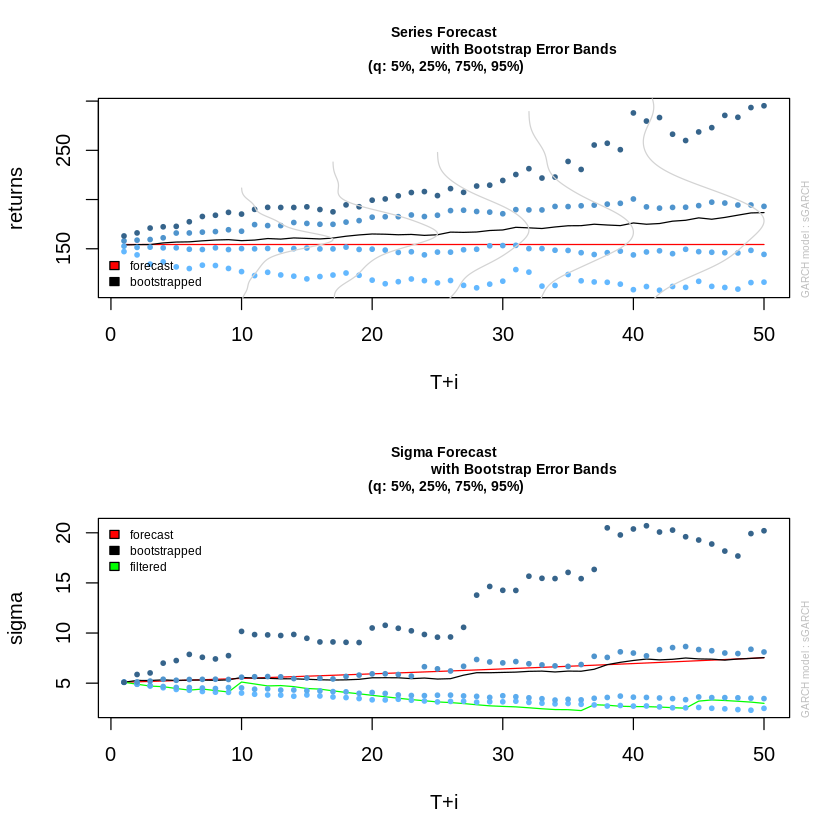

In [376]:
boot = ugarchboot(fit, method = c("Partial", "Full")[1], n.ahead = 50, n.bootpred = 50)
show(boot)
plot(boot, which = "all")
#str(forecast)
#forecast@forecast$seriesFor
#Test
# forecast
# actual
# predicted = as.xts(forecast@forecast$seriesFor[1,])
# names(predicted)
# as.xts(forecast@forecast$seriesFor[1,])
# as.xts(actual)

#forecast

# actualXts=as.xts(actual, dateFormat="Date")
# names(actualXts) = "Actual"

# forecastXts = as.xts(forecast@forecast$seriesFor[1,], dateFormat="Date")
# names(forecastXts) = "Forecast"

# result = merge(actualXts, forecastXts)

# ggplot(result, aes(Index)) + 
#     geom_line(aes(y = result$Forecast, color="predicted")) +
#     geom_line(aes(y = result$Actual), linetype="dashed")


In [370]:
rff=ugarchfit(spec=spec, data=Price, out.sample=500, solver="hybrid")
rf=ugarchforecast(rff, n.ahead=20, n.roll=1)
rf


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 20
Roll Steps: 1
Out of Sample: 20

0-roll forecast [T0=2017-04-03]:
     Series Sigma
T+1   139.3 1.164
T+2   139.3 1.172
T+3   139.3 1.180
T+4   139.3 1.188
T+5   139.3 1.197
T+6   139.3 1.205
T+7   139.3 1.213
T+8   139.3 1.221
T+9   139.3 1.230
T+10  139.3 1.238
T+11  139.3 1.247
T+12  139.3 1.255
T+13  139.3 1.264
T+14  139.3 1.272
T+15  139.3 1.281
T+16  139.3 1.290
T+17  139.3 1.299
T+18  139.3 1.308
T+19  139.3 1.317
T+20  139.3 1.326



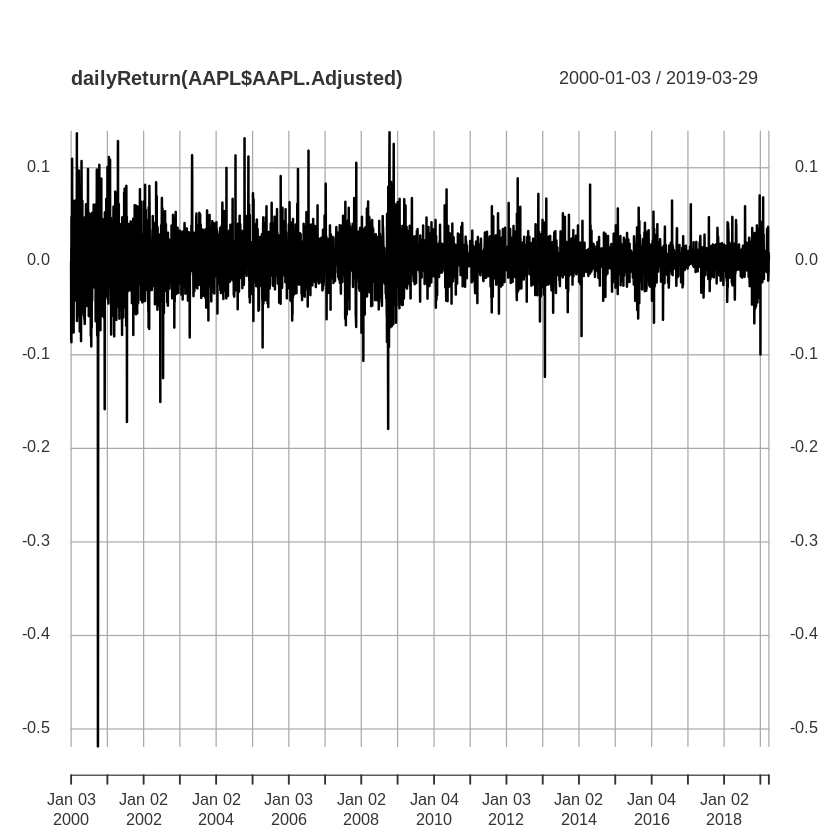

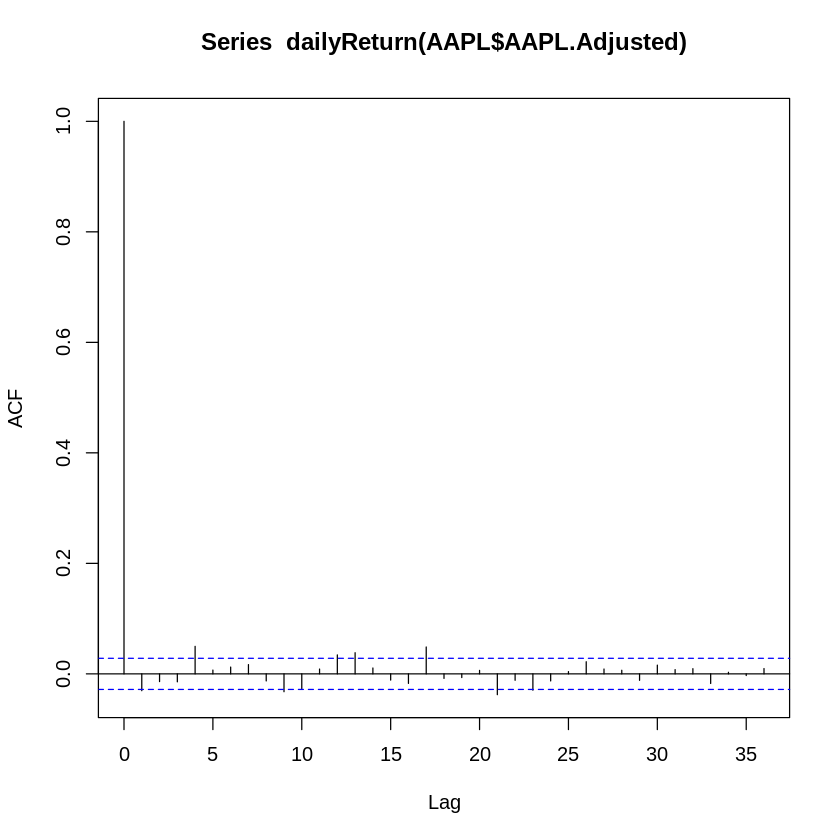

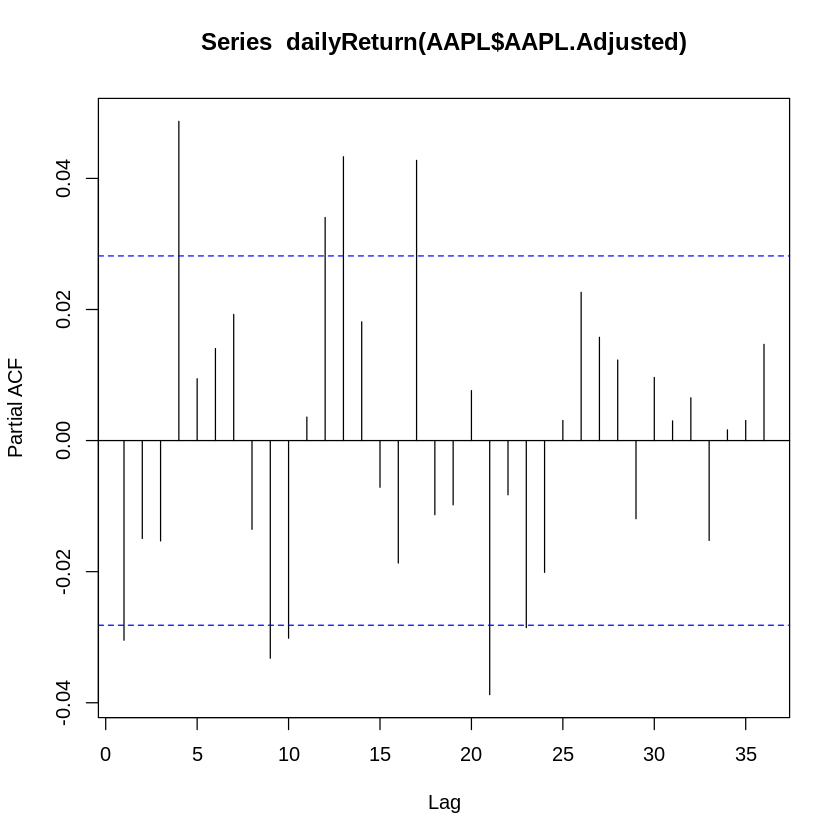

In [238]:
plot(dailyReturn(AAPL$AAPL.Adjusted))
acf(dailyReturn(AAPL$AAPL.Adjusted))
pacf(dailyReturn(AAPL$AAPL.Adjusted))

## References
https://www.quantstart.com/articles/ARIMA-GARCH-Trading-Strategy-on-the-SP500-Stock-Market-Index-Using-R
https://rstudio-pubs-static.s3.amazonaws.com/258811_b43d4c7bb2c74851b5b95f29a09c5b30.html